# Задача по ЦПТ

In [6]:
#импортируем необходимые библиотеки
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy
from scipy.stats import gamma

## определение + формулы

Га́мма-распределе́ние в теории вероятностей — это двухпараметрическое семейство абсолютно непрерывных распределений. Если параметр k принимает целое значение, то такое гамма-распределение также называется распределе́нием Эрла́нга.
Плотностью вероятности имеет вид

Посмотрим формулу из wiki:
  
$$
f(x;\theta,k) =
\begin{cases}
x^{k-1} \frac{e^{-x/\theta}}{\theta^k Г(k)} & x\geq0 ,\\
0 & x<0,
\end{cases}$$

формулы из scipy:

<code>x\*\*(a-1) \* exp(-x) / Г(a)</code>

или

$$f(x) = \frac{x^{a-1} e^{- x}}{Г(a)}$$

и

- <code>gamma.pdf(y, a) / scale</code>

- <code>y = (x - loc) / scale</code>

т.е.

1. $a = k$
2. $loc = 0$
3. $scale = \theta$

## график 

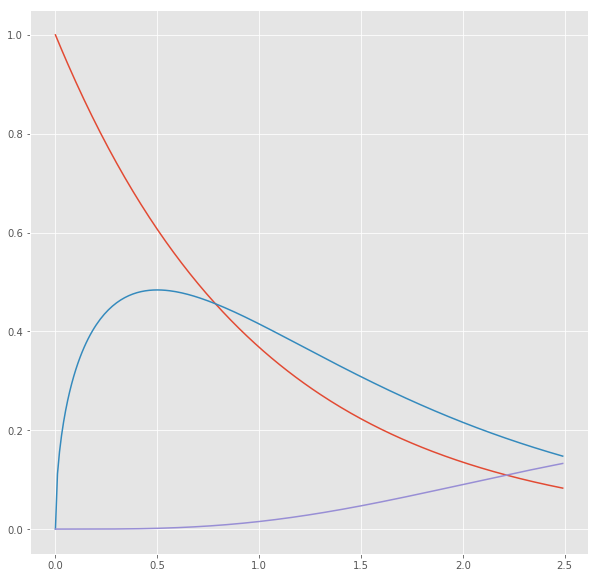

In [7]:
c = [1, 1.5, 5]

x = np.arange(0, 2.5, 0.01)
plt.figure(figsize=(10, 10))

rv = scipy.stats.gamma(c[0])
plt.plot(x, rv.pdf(x))

rv = scipy.stats.gamma(c[1])
plt.plot(x, rv.pdf(x))

rv = scipy.stats.gamma(c[2])
plt.plot(x, rv.pdf(x))
plt.show()

## _почему нравится_:

Это распределение описывает групповые потоки в сложных экономических системах. Например задержек заказов в очередях, платежей и тд.
А мне нравится экономика.

## Генерация выборки объема 1000

Построение гистограммы выборки и рисование поверх неё теоретической плотности распределения случайной величины.
Оси подписаны.

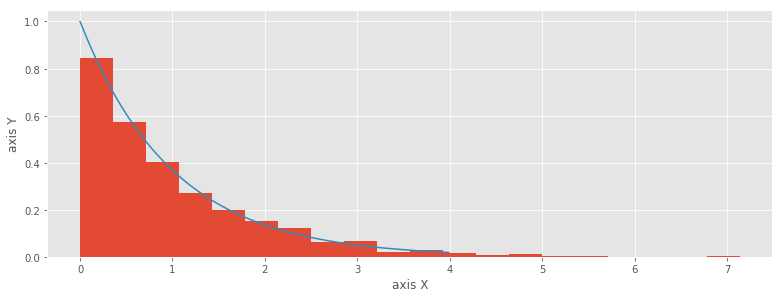

In [8]:
import scipy.stats as sts
k = 1
theta = 1
n = 1000
rv = sts.gamma(a = k, loc = 0, scale = theta)

sample = rv.rvs(n)

fig = plt.figure(figsize=(13, 10))

ax = fig.add_subplot(211)
x = np.arange(0, 4, 0.01)
plt.hist(sample, normed=True, bins=20)
ax.set_ylabel('axis Y')
ax.set_xlabel('axis X')

plt.plot(x, rv.pdf(x))
plt.show()

## Генерация 1000 выборок объёма n для нескольких значений n (например, 5, 10, 50) 
## и построение гистограмм распределения их выборочных средних.

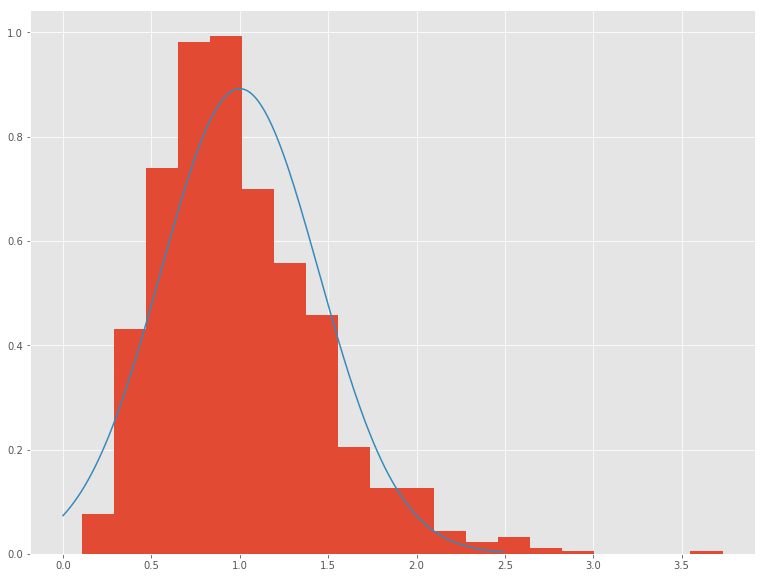

In [9]:
n=5
sample = rv.rvs(size=(1000, n))
means = sample.mean(axis=1)
mu=1
E = k*mu #расчет мат ожидания
var = k*mu*mu #расчет дисперсии
E_norm = E
var_norm = var*1.0 / n
import scipy.stats as sts
rv_norm = sts.norm(E_norm, var_norm**0.5)
plt.figure(figsize=(13, 10))
x = np.arange(0., 2.5, 0.01)

plt.hist(means, normed=True, bins=20)
plt.plot(x, rv_norm.pdf(x))
plt.show()

In [10]:
rv.rvs(1000).mean()

0.9387425447402229

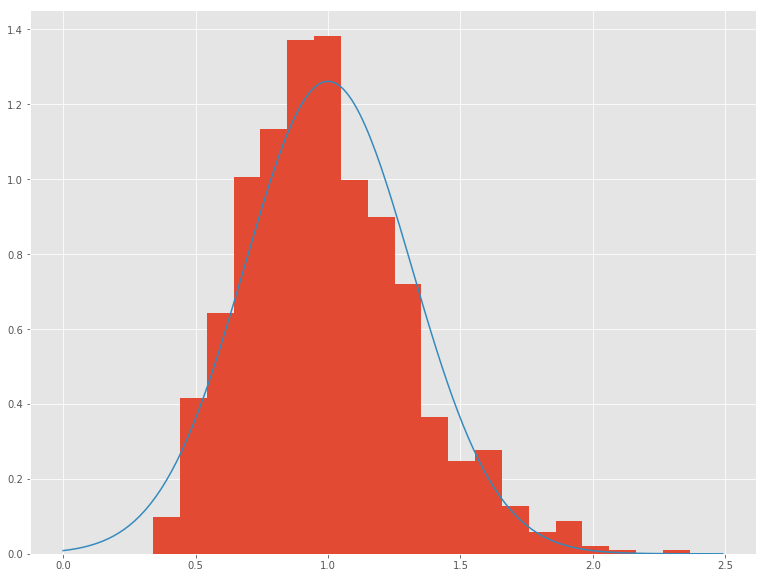

In [11]:
n=10
sample = rv.rvs(size=(1000, n))
means = sample.mean(axis=1)
mu=1
E = k*mu
var = k*mu*mu
E_norm = E
var_norm = var*1.0 / n
import scipy.stats as sts
rv_norm = sts.norm(E_norm, var_norm**0.5)
plt.figure(figsize=(13, 10))
x = np.arange(0., 2.5, 0.01)

plt.hist(means, normed=True, bins=20)
plt.plot(x, rv_norm.pdf(x))
plt.show()

In [12]:
rv.rvs(1000).mean()

0.9857839674721569

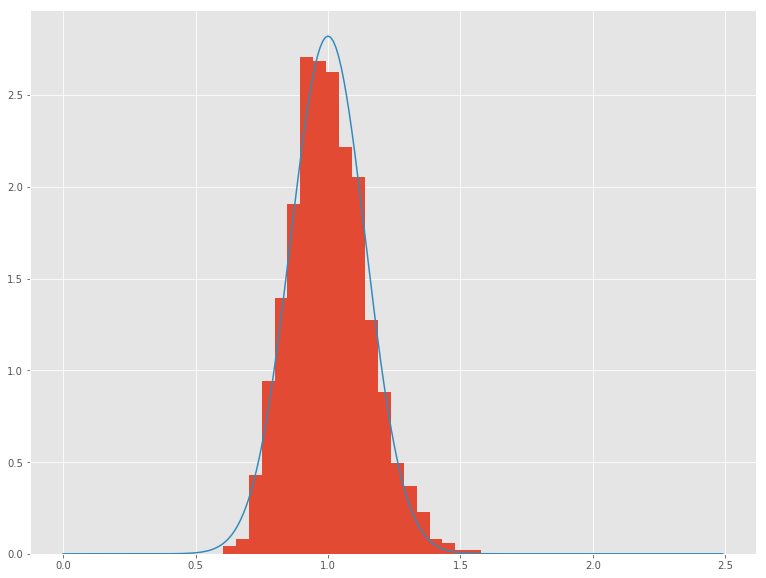

In [19]:
n=50
sample = rv.rvs(size=(1000, n))
means = sample.mean(axis=1)
mu=1
E = k*mu
var = k*mu*mu
E_norm = E
var_norm = var*1.0 / n
import scipy.stats as sts
rv_norm = sts.norm(E_norm, var_norm**0.5)
plt.figure(figsize=(13, 10))
x = np.arange(0., 2.5, 0.01)

plt.hist(means, normed=True, bins=20)
plt.plot(x, rv_norm.pdf(x))
plt.show()

In [20]:
rv.rvs(1000).mean()

1.0028431326180494

# Вывод:

In [ ]:
Точность аппроксимации распределения выборочных средних нормальным с ростом n увеличивается.
